In [34]:
import pandas as pd
import numpy as np
import scipy.stats as sct
import random
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from pandas_datareader import data as web
style.use('ggplot')

# ***1) Valuation Model***



---


 
 
 **Dividend Discount Model or Discounted Cashflow Model**

$$V_0 = \frac{D_0(1 + g)}{(1 + r)} + \frac{D_0(1 + g)^2}{(1 + r)^2} + ... + \frac{D_0(1 + g)^n}{(1 + r)^n}$$

 **Gordon Growth Model** 

$$V_0 = \frac{D_0(1 + g)}{r - g}$$

where, 

                   Do = current/recent dividend per share
                   g = dividend growth rate
                   r = required rate of return

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Market Value')

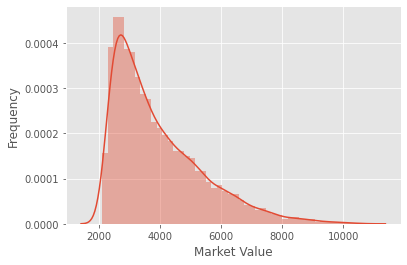

In [35]:
## Modelling using uniform distribution

d0 = 100
data1 = []

for x in range(10000):
    g = random.uniform(0.05,0.08)
    r = random.uniform(0.09,0.10)
    d1 = d0*(1+g)                            ## d1 = expected dividend next year
    v0 = d1/(r-g)
    data1.append(v0)
    
sns.distplot(data1)
plt.ylabel('Frequency')
plt.xlabel('Market Value')

In [36]:
# Lets convert it into Dataframe to see the statistics easily

df1 = pd.DataFrame(data1)
df1.describe()

,0
count,10000.000000
mean,3945.812074
std,1464.343037
min,2116.804522
25%,2804.590396
50%,3522.038766
75%,4733.834980
max,10687.272751


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Market Value')

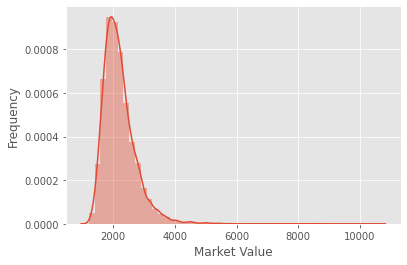

In [37]:
## Modelling using Normal Distribution

d_0 = 100
g_mean = 0.05
g_sd = 0.01

data2 = []

for x in range(10000):
    g = sct.norm.ppf(random.uniform(0,1),loc=g_mean,scale=g_sd)
    r = 0.10
    d_1 = d_0*(1+g)
    v_0 = d_1/(r-g)
    data2.append(v_0)

sns.distplot(data2)
plt.ylabel('Frequency')
plt.xlabel('Market Value')

In [38]:
# Lets convert it into Dataframe to see the statistics easily

df2 = pd.DataFrame(data2)
df2.describe()

,0
count,10000.000000
mean,2198.548343
std,529.680644
min,1205.779639
25%,1840.338251
50%,2100.632876
75%,2440.593371
max,10576.165838


In [39]:
df2.pct_change()

,0
0,NaN
1,-0.110519
2,0.006619
3,0.186334
4,-0.003513
...,...
9995,0.183993
9996,0.304305
9997,-0.301237
9998,-0.028666


# ***2) Monte Carlo Simulation for Stocks***



---



**Here we'll create the random potential future daily returns for each day.** 

Taking the drift and the standard deviations along with the some random percent values and using that to create the potential future daily returns for each day.

In [40]:


def get_simulation(ticker, name):
    data = pd.DataFrame()
    data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2015-1-1')['Adj Close']


    log_returns = np.log(1 + data.pct_change())
    u = log_returns.mean()

	# Essentially this is how far stock prices are spread out from the mean
    var = log_returns.var()

	# This is the change the average value in our stock prices over time.
    drift = u - (0.5 * var)

	# This is a measure of the dispersion of the stock prices. 
    stdev = log_returns.std()

    t_intervals = 365
    iterations = 10

    daily_returns = np.exp(drift.values + stdev.values * sct.norm.ppf(np.random.rand(t_intervals, iterations)))
    S0 = data.iloc[-1]
	
	# Here we are using np.zeros_like to create a numpy array, which is filled with 
	#	zeros but has the same shape as the daily_returns numpy array. 

	#	We are going to iterate to insert the price at the end of each future day,	based on the random 

    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0

    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    plt.figure(figsize=(10,6))
    plt.title("1 Year Monte Carlo Simulation for " + name)
    plt.ylabel("Price (P)")
    plt.xlabel("Time (Days)")
    plt.plot(price_list);
    plt.show()


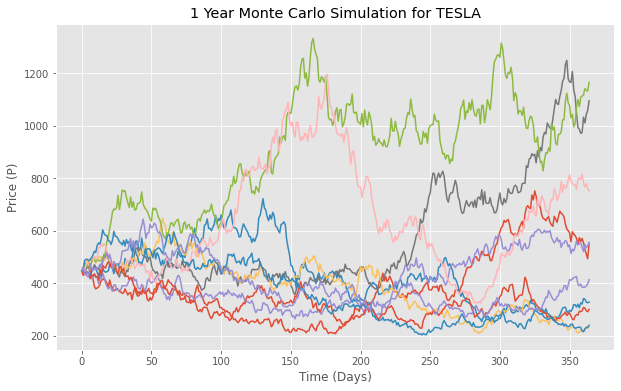

In [41]:
get_simulation("TSLA", "TESLA")